### Descriptive analysis of Formula 1 2024 season

In [3]:
import pandas as pd
df = pd.read_csv(r"C:\Users\s29sh\Downloads\Formula1_2024season_sprintResults.csv")

summary = {
    "shape": df.shape,
    "columns": df.columns.tolist(),
    "sample_data": df.head(5)
}

print(summary)

{'shape': (120, 9), 'columns': ['Track', 'Position', 'No', 'Driver', 'Team', 'Starting Grid', 'Laps', 'Time/Retired', 'Points'], 'sample_data':    Track Position  No           Driver                        Team  \
0  China        1   1   Max Verstappen  Red Bull Racing Honda RBPT   
1  China        2  44   Lewis Hamilton                    Mercedes   
2  China        3  11     Sergio Perez  Red Bull Racing Honda RBPT   
3  China        4  16  Charles Leclerc                     Ferrari   
4  China        5  55     Carlos Sainz                     Ferrari   

   Starting Grid  Laps Time/Retired  Points  
0              4    19    32:04.660       8  
1              2    19      +13.043       7  
2              6    19      +15.258       6  
3              7    19      +17.486       5  
4              5    19      +20.696       4  }


### Who was the most improved driver this year

In [16]:
import pandas as pd

# Load dataset
CSV_PATH = r"C:\Users\s29sh\Downloads\Formula1_2024season_sprintResults.csv"
df = pd.read_csv(CSV_PATH)

# Convert columns to numeric
df["Starting Grid"] = pd.to_numeric(df["Starting Grid"], errors="coerce")
df["Position"] = pd.to_numeric(df["Position"], errors="coerce")

# Drop rows with missing data
df_clean = df.dropna(subset=["Starting Grid", "Position"]).copy()

# Calculate Improvement per race (positive = gained places)
df_clean["Improvement"] = df_clean["Starting Grid"] - df_clean["Position"]

# Average improvement per driver
avg_improvement = df_clean.groupby("Driver")["Improvement"].mean().sort_values(ascending=False)

# Most improved driver
most_improved_driver = avg_improvement.idxmax()
most_improved_value = avg_improvement.max()

print(" Most Improved Driver in Sprint Races 2024 ")
print(f"{most_improved_driver} with an average of {most_improved_value:.2f} positions gained per sprint race.")
print("\nTop 5 most improved drivers:")
print(avg_improvement.head(5))


 Most Improved Driver in Sprint Races 2024 
Logan Sargeant with an average of 3.00 positions gained per sprint race.

Top 5 most improved drivers:
Driver
Logan Sargeant      3.000000
Daniel Ricciardo    1.666667
Alexander Albon     1.666667
Yuki Tsunoda        1.666667
Oscar Piastri       1.500000
Name: Improvement, dtype: float64


### Which team earned the most sprint points overall in the 2024 season?

In [4]:
team_points = df.groupby("Team")["Points"].sum().sort_values(ascending=False)
top_team = team_points.head(1)

top_team

Team
McLaren Mercedes    57
Name: Points, dtype: int64

### Which driver had the best average finishing position in sprint races during the 2024 season?

In [6]:
df["Position"] = pd.to_numeric(df["Position"], errors="coerce")
avg_position = df.groupby("Driver")["Position"].mean().sort_values()
print(avg_position.head(5))

Driver
Max Verstappen     2.666667
Lando Norris       3.000000
Charles Leclerc    4.166667
Carlos Sainz       4.333333
Oscar Piastri      4.666667
Name: Position, dtype: float64


### Pdium / wins

In [8]:
print("\n WINS / PODIUMS")
wins = (df["Position"] == 1).groupby(df["Driver"]).sum().sort_values(ascending=False)
podiums = (df["Position"] <= 3).groupby(df["Driver"]).sum().sort_values(ascending=False)
print("Driver wins:\n", wins.head(10))
print("\nDriver podiums:\n", podiums.head(10))


 WINS / PODIUMS
Driver wins:
 Driver
Max Verstappen      4
Lando Norris        1
Oscar Piastri       1
Daniel Ricciardo    0
Alexander Albon     0
Carlos Sainz        0
Charles Leclerc     0
Franco Colapinto    0
Fernando Alonso     0
Esteban Ocon        0
Name: Position, dtype: int64

Driver podiums:
 Driver
Lando Norris        4
Max Verstappen      4
Oscar Piastri       3
Sergio Perez        2
Charles Leclerc     2
Carlos Sainz        1
Lewis Hamilton      1
George Russell      1
Franco Colapinto    0
Esteban Ocon        0
Name: Position, dtype: int64


### Track insights of season 2024

In [10]:
print("\n TRACK SNAPSHOT (Avg Points & Avg Finish by Driver) ")
if "Track" in df.columns:
    track_driver_summary = (
        df.groupby(["Track", "Driver"])
          .agg(avg_points=("Points", "mean"),
               avg_finish=("Position", "mean"),
               starts=("Position", "size"))
          .reset_index()
          .sort_values(["Track", "avg_finish"])
    )
    # Show just the first few rows per track to keep output compact
    for track in track_driver_summary["Track"].unique()[:5]:
        print(f"\n-- {track} --")
        print(track_driver_summary[track_driver_summary["Track"] == track].head(5))
else:
    print("No 'Track' column present.")


 TRACK SNAPSHOT (Avg Points & Avg Finish by Driver) 

-- Austria --
      Track          Driver  avg_points  avg_finish  starts
13  Austria  Max Verstappen         8.0         1.0       1
15  Austria   Oscar Piastri         7.0         2.0       1
10  Austria    Lando Norris         6.0         3.0       1
6   Austria  George Russell         5.0         4.0       1
1   Austria    Carlos Sainz         4.0         5.0       1

-- Brazil --
     Track           Driver  avg_points  avg_finish  starts
29  Brazil     Lando Norris         8.0         1.0       1
35  Brazil    Oscar Piastri         7.0         2.0       1
22  Brazil  Charles Leclerc         6.0         3.0       1
32  Brazil   Max Verstappen         5.0         4.0       1
21  Brazil     Carlos Sainz         4.0         5.0       1

-- China --
    Track           Driver  avg_points  avg_finish  starts
53  China   Max Verstappen         8.0         1.0       1
51  China   Lewis Hamilton         7.0         2.0       1
57  Chi

### Which team performs best under pressure?

In [12]:
under_pressure = df[df["Starting Grid"] > 10]

team_pressure_perf = (
    under_pressure.groupby("Team")[["Position", "Points"]]
    .mean()
    .sort_values(by="Points", ascending=False)
)

print("\n=== Team Performance When Starting Outside Top 10 ===")
print(team_pressure_perf.head(5))


=== Team Performance When Starting Outside Top 10 ===
                               Position    Points
Team                                             
Red Bull Racing Honda RBPT    12.333333  0.333333
Mercedes                      11.750000  0.250000
RB Honda RBPT                 13.750000  0.125000
Alpine Renault                13.500000  0.000000
Aston Martin Aramco Mercedes  14.555556  0.000000


### 1) Does gaining positions (Improvement) correlate with earning more points in sprint races?
### 2) Does starting further forward (Starting Grid) correlate with earning more points?

Correlation between Improvement (gaining positions) and Points: 0.04
Correlation between Starting Grid and Points: -0.81


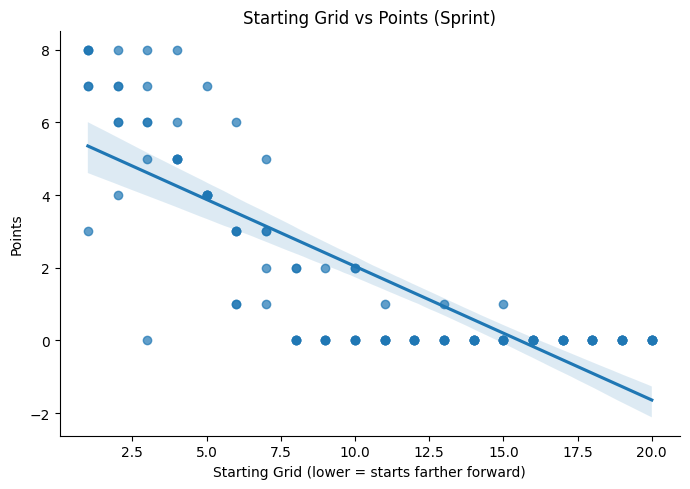

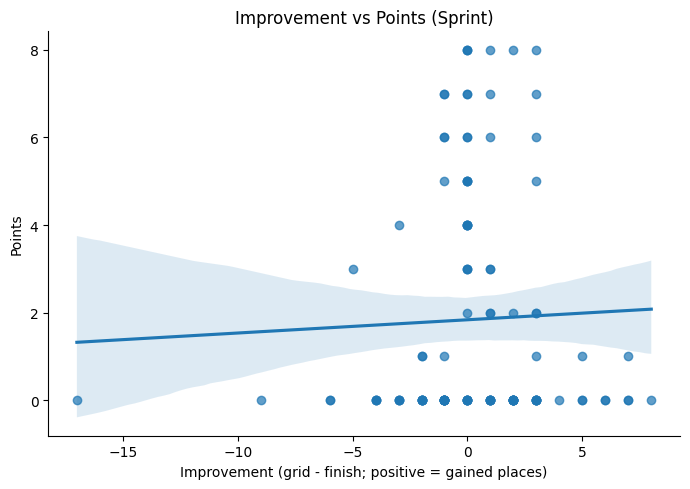

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load data 
CSV_PATH = r"C:\Users\s29sh\Downloads\Formula1_2024season_sprintResults.csv"
df = pd.read_csv(CSV_PATH)

# Ensure numeric types 
for col in ["Starting Grid", "Position", "Points"]:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors="coerce")

# Clean rows used in analysis 
df_clean = df.dropna(subset=["Starting Grid", "Position", "Points"]).copy()

# Improvement = positions gained (positive means finished ahead of grid spot)
df_clean["Improvement"] = df_clean["Starting Grid"] - df_clean["Position"]

#Correlations
improvement_vs_points_corr = df_clean["Improvement"].corr(df_clean["Points"])
start_vs_points_corr = df_clean["Starting Grid"].corr(df_clean["Points"])

print(f"Correlation between Improvement (gaining positions) and Points: {improvement_vs_points_corr:.2f}")
print(f"Correlation between Starting Grid and Points: {start_vs_points_corr:.2f}")

#  Plots (with simple trend lines) 
# 1) Starting Grid vs Points
sns.lmplot(data=df_clean, x="Starting Grid", y="Points", height=5, aspect=1.4, scatter_kws={"alpha":0.7})
plt.title("Starting Grid vs Points (Sprint)")
plt.xlabel("Starting Grid (lower = starts farther forward)")
plt.ylabel("Points")
plt.tight_layout()
plt.show()

# 2) Improvement vs Points
sns.lmplot(data=df_clean, x="Improvement", y="Points", height=5, aspect=1.4, scatter_kws={"alpha":0.7})
plt.title("Improvement vs Points (Sprint)")
plt.xlabel("Improvement (grid - finish; positive = gained places)")
plt.ylabel("Points")
plt.tight_layout()
plt.show()